In [ ]:
<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Load-tikzmagic" data-toc-modified-id="Load-tikzmagic-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load tikzmagic</a></span></li><li><span><a href="#tikz-network" data-toc-modified-id="tikz-network-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>tikz-network</a></span><ul class="toc-item"><li><span><a href="#First-Graph---Vertex-Locations" data-toc-modified-id="First-Graph---Vertex-Locations-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>First Graph - Vertex Locations</a></span></li><li><span><a href="#Vertex-Labels" data-toc-modified-id="Vertex-Labels-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Vertex Labels</a></span></li></ul></li><li><span><a href="#Problem-1" data-toc-modified-id="Problem-1-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Problem 1</a></span></li><li><span><a href="#Problem-2" data-toc-modified-id="Problem-2-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Problem 2</a></span></li><li><span><a href="#Problem-3" data-toc-modified-id="Problem-3-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Problem 3</a></span></li><li><span><a href="#Sandbox" data-toc-modified-id="Sandbox-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Sandbox</a></span></li></ul></div>

This is the notebook containing solutions to Chapter 1 of the [Tensor Network lecture notes by Bridgeman and Chubb](http://arxiv.org/abs/1603.03039).

We will use `sympy` to perform tensor network contractions and `tikz-network` to plot the associated networks.

In [2]:
import sympy
from sympy import Array, symbols, Matrix

In [23]:
from sympy import *

# Load tikzmagic

In [49]:
%load_ext tikzmagic

# tikz-network

Remember that we have to use the package `tikz-network`. This can be done by passing the `-p tikz-network` option to the `%%tikz` cell magic

## First Graph - Vertex Locations

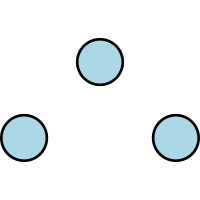

In [50]:
%%tikz -s 200,200 -f svg -p tikz-network
\Vertex{A}
\Vertex[x=1,y=1]{B}
\Vertex[x=2]{C}

## Vertex Labels

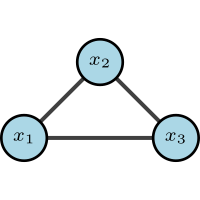

In [52]:
%%tikz -s 200,200 -f svg -p tikz-network
\Vertex[label=$x_1$]{A}
\Vertex[label=$x_2$,x=1,y=1]{B}
\Vertex[label=$x_3$,x=2]{C}
\Edge(A)(B)
\Edge(B)(C)
\Edge(C)(A)

# Problem 1

Define the following tensors:
\begin{align}
    A_{ij} = i^2 - 2j \\
    B_{ijk} = -3^i j + k \\
    C_{ij} = j \\
    D_{ijk} = ijk
\end{align}
Evaluate the tensor network contraction given by:
\begin{align}
    A_{ij} B_{jkl} C_{lm} D_{ikm} 
\end{align}
where all the indices are three-dimensional, indexed from 0.

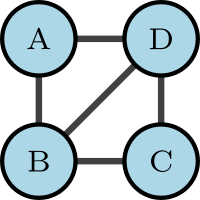

In [56]:
%%tikz -s 200,200 -f svg -p tikz-network
\Vertex[label=A]{A}
\Vertex[label=B,y=-1]{B}
\Vertex[label=C,x=1,y=-1]{C}
\Vertex[label=D,x=1]{D}
\Edge(A)(B)
\Edge(B)(C)
\Edge(C)(D)
\Edge(D)(A)
\Edge(B)(D)

In [3]:
A = Matrix(3,3,lambda i,j: i**2 - 2*j)
A

Matrix([
[0, -2, -4],
[1, -1, -3],
[4,  2,  0]])

In [24]:
A = symarray('a',shape=(3,3))

In [25]:
A

array([[a_0_0, a_0_1, a_0_2],
       [a_1_0, a_1_1, a_1_2],
       [a_2_0, a_2_1, a_2_2]], dtype=object)

In [26]:
A[0,0]

a_0_0

In [28]:
A = MutableDenseNDimArray([1]*9,shape=(3,3))

In [29]:
B = MutableDenseNDimArray([1]*27,shape=(3,3,3))

In [30]:
C = MutableDenseNDimArray([1]*9,shape=(3,3))
D = MutableDenseNDimArray([1]*27,shape=(3,3,3))

In [31]:
for i in range(3):
    for j in range(3):
        A[i,j] = i**2 - 2*j
        C[i,j] = j
        for k in range(3):
            B[i,j,k] = -(3**i)*j + k
            D[i,j,k]= i*j*k

In [32]:
A,B,C,D

([[0, -2, -4], [1, -1, -3], [4, 2, 0]],
 [[[0, 1, 2], [-1, 0, 1], [-2, -1, 0]], [[0, 1, 2], [-3, -2, -1], [-6, -5, -4]], [[0, 1, 2], [-9, -8, -7], [-18, -17, -16]]],
 [[0, 1, 2], [0, 1, 2], [0, 1, 2]],
 [[[0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 1, 2], [0, 2, 4]], [[0, 0, 0], [0, 2, 4], [0, 4, 8]]])

In [33]:
AB = tensorproduct(A,B)

In [36]:
AB = tensorcontraction(AB,(1,2))

In [39]:
ABCD = tensorproduct(A,B,C,D)

In [40]:
ABCD

[[[[[[[[[[0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0]]], [[[0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0]]], [[[0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0]]]], [[[[0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0]]], [[[0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0]]], [[[0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0]]]], [[[[0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0]]], [[[0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0]]], [[[0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0]]]]], [[[[[0, 0, 0], [0, 0, 0]

To contract over more than one set of indices is possible

In [48]:
ans = tensorcontraction(ABCD,(1,2),(3,8),(6,9),(0,7),(4,5))
ans

1080

# Problem 2

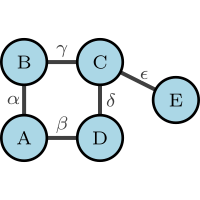

In [69]:
%%tikz -s 200,200 -f svg -p tikz-network
\Vertex[label=B]{B}
\Vertex[label=A,y=-1]{A}
\Vertex[label=D,x=1,y=-1]{D}
\Vertex[label=C,x=1]{C}
\Vertex[label=E,x=2,y=-0.5]{E}
\Edge[label=$\alpha$,position=left](A)(B)
\Edge[label=$\gamma$,position=above](B)(C)
\Edge[label=$\delta$,position=right](C)(D)
\Edge[label=$\beta$,position=above](D)(A)
\Edge[label=$\epsilon$,position=above right](C)(E)

# Problem 3

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import networkx as nx

In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt

In [3]:
g = nx.Graph()

In [13]:
g.add_nodes_from(range(6))

In [14]:
g.nodes()

[0, 1, 2, 3, 4, 5]

In [16]:
g = nx.cycle_graph(5)

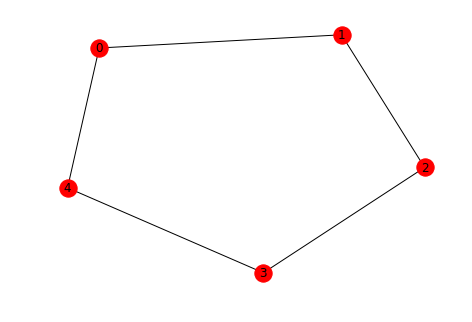

In [20]:
nx.draw(g,with_labels=True)

In [22]:
g.add_node(5)

In [23]:
g.add_edge(3,5)

In [24]:
g.add_edge(4,5)

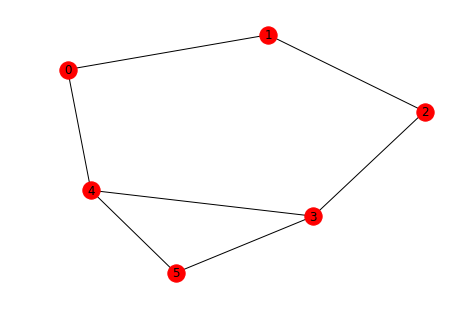

In [25]:
nx.draw(g,with_labels=True)

In [30]:
g.edge[0]

{1: {}, 4: {}}

In [33]:
for e in g.edges_iter():
    node1 = e[0]
    node2 = e[1]
    print(node1,node2)

0 1
0 4
1 2
2 3
3 4
3 5
4 5


In [35]:
g.remove_edge(0,1)

In [38]:
g.add_node("01")

In [39]:
g.add_edge(0,"01")
g.add_edge("01",1)

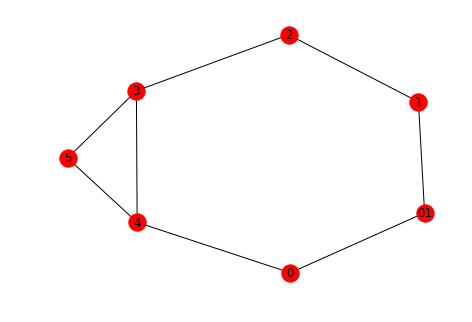

In [40]:
nx.draw(g,with_labels=True)

In [ ]:
g = nx.cycle_graph

In [6]:
G = nx.petersen_graph()

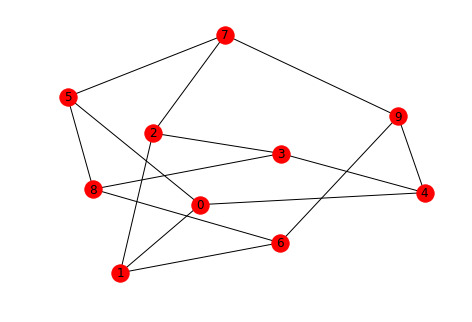

In [21]:
nx.draw(G,with_labels=True)

In [12]:
print(G)

Petersen Graph


# Sandbox

In [3]:
import sympy
from sympy import Array, symbols

In [19]:
B = Array([1]*27,shape=(3,3,3))

In [20]:
B

[[[1, 1, 1], [1, 1, 1], [1, 1, 1]], [[1, 1, 1], [1, 1, 1], [1, 1, 1]], [[1, 1, 1], [1, 1, 1], [1, 1, 1]]]

In [21]:
B[2,2,2]

1

In [22]:
for i in range(3):
    for j in range(3):
        for k in range(3):
            B[i,j,k] = -(3**i)*j + k

TypeError: immutable N-dim array

In [6]:
sympy.MutableDenseNDimArray?

In [8]:
i, j, k = symbols('i j k')

In [10]:
type(i)

sympy.core.symbol.Symbol

In [13]:
A = sympy.eye(3)
A

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [25]:
for a in range(3):
    for b in range(3):
        A[a,b] = a**2 - 2*b

In [26]:
A

Matrix([
[0, -2, -4],
[1, -1, -3],
[4,  2,  0]])

In [27]:
A[0,0]

0

In [21]:
sympy.Matrix(3,3, lambda i, j: i**2 - 2*j)

Matrix([
[0, -2, -4],
[1, -1, -3],
[4,  2,  0]])

In [37]:
A = sympy.eye(3)
A

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [38]:
i, j = symbols('i j')

In [40]:
A[i,j] = i**2 - 2*j

IndexError: Invalid index a[i]

In [45]:
def crearMatrix(name,shape=(2,2)):
    X = []
    for i in range(shape[0]):
        row = []
        for j in range(shape[1]):
            row.append(sympy.Symbol("a"+'_{'+str(i*10+j+11)+'}'))
        X.append(row)
    return sympy.Matrix(X)

A = crearMatrix("a")
print(sympy.latex(A))
print(sympy.latex(A**2))


\left[\begin{matrix}a_{11} & a_{12}\\a_{21} & a_{22}\end{matrix}\right]
\left[\begin{matrix}a_{11}^{2} + a_{12} a_{21} & a_{11} a_{12} + a_{12} a_{22}\\a_{11} a_{21} + a_{21} a_{22} & a_{12} a_{21} + a_{22}^{2}\end{matrix}\right]


In [47]:
%%latex
$$A = \left[\begin{matrix}a_{11} & a_{12}\\a_{21} & a_{22}\end{matrix}\right]$$
$$A^2 = \left[\begin{matrix}a_{11}^{2} + a_{12} a_{21} & a_{11} a_{12} + a_{12} a_{22}\\a_{11} a_{21} + a_{21} a_{22} & a_{12} a_{21} + a_{22}^{2}\end{matrix}\right]$$

<IPython.core.display.Latex object>

In [48]:
from sympy import tensor, tensorcontraction, tensorproduct

In [50]:
tensor.array?